### Strategy Backtesting Using Python (DMP-1)
#### Notebook Created on:  15 May 2020
##### _Last Update: 1 Jun 2022_
##### Author: Vivek Krishnamoorthy (with inputs from Mario Pisa Pena, Jay Parmar and Ashutosh Dave)

### Today's Agenda


- Step-wise approach to creating and testing trading strategies (slides)
- Strategy 1A: Simple moving averages (on 5 minute data)
- Strategy 1B: Exponential moving averages (on 5 minute data)
- Strategy 2: Big moves on Mondays
- Strategy 3: Moving average crossover (The “Hello World” of quant trading approaches)
- Strategy 4: MACD (if time permits)
- A glimpse at `PyFolio`

### Warming up - Basic applications of Moving Averages

#### Strategy # 1A: Simple Moving Average *(Long only)*

<div class="alert alert-info"><strong>Step I: Coming up with a trading idea (Using 5-minute data)</strong>

<br>We determine the 12-period simple moving average (referred to as 'SMA12') and compare it with the price at that time. We (subjectively) select 12 since SMA12 would be the average price over one hour.

There are two conditions which we check.

1. If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.

2. When the price becomes less than the SMA12, we square off our long position.

Our trading rules can be stated as

* Buy when price > SMA12
* Square off when price < SMA12
</div>

In [4]:
#!pip list

In [5]:
#################################################################
################### Class Exercise 1 ############################
############## Step II (downloading the data) ###################
############## Step VII (contingency plan) ######################
#################################################################

# Import the required libraries with the usual shorthand notations where possible
# Create a variable called end1 for today. Use the datetime library.
# Create a variable start1 which is 50 days before end1
# Use the yfinance library to download the data into a variable df for "Nifty" OHLCV data 
# between start1 and end1.
# The data has to be at 5 minute intervals.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame



# For backtesting the strategy, please use the attached csv file and import into pandas
# Call the pandas DataFrame df
# Check the data type, the dimensions, the first few and last few rows of df
# Create a copy of df called df1a. (We will manipulate and work with the df1a DataFrame.)

```python

import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


# To use interactive plotting we can also use cufflinks

import cufflinks as cf

# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline


end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=50)

df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

# Run the below lines to load the data used in backtesting the strategy 


df = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df1a = df.copy()

```

In [6]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# To use interactive plotting we can also use cufflinks
import cufflinks as cf

# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [7]:
end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=50)

In [8]:
df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
(2625, 6)
                                   Open          High           Low  \
Datetime                                                              
2022-04-19 09:15:00+05:30  17258.949219  17273.150391  17207.699219   
2022-04-19 09:20:00+05:30  17207.550781  17215.400391  17177.449219   
2022-04-19 09:25:00+05:30  17192.650391  17205.400391  17177.849609   
2022-04-19 09:30:00+05:30  17202.150391  17214.699219  17184.650391   
2022-04-19 09:35:00+05:30  17190.500000  17192.599609  17160.949219   

                                  Close     Adj Close  Volume  
Datetime                                                       
2022-04-19 09:15:00+05:30  17207.699219  17207.699219       0  
2022-04-19 09:20:00+05:30  17192.349609  17192.349609       0  
2022-04-19 09:25:00+05:30  17201.849609  17201.849609       0  
2022-04-19 09:30:00+05:30  17190.849609  17190.849609       0  
2

In [9]:
df1a = df.copy()

In [10]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")
# df1.to_csv("NSE_5min_interval.csv")
# df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
# df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [11]:
################################################################
################### Class Exercise 2 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################


# Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
# Delete the columns 'High', 'Low' and Volume' from df1a
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a variable called sma and assign it a value 12
# Create a column called 'sma' which is the 12-period moving average of the 'Close' price
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?

```python

df1a.loc['12 May 2020', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9))
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)
df1a['cc_returns'] = df1a['Close'].pct_change()
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head())
print(df1a.tail())
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)

df1a['position'].value_counts()
print(df1a.head())
print(df1a.tail())
```

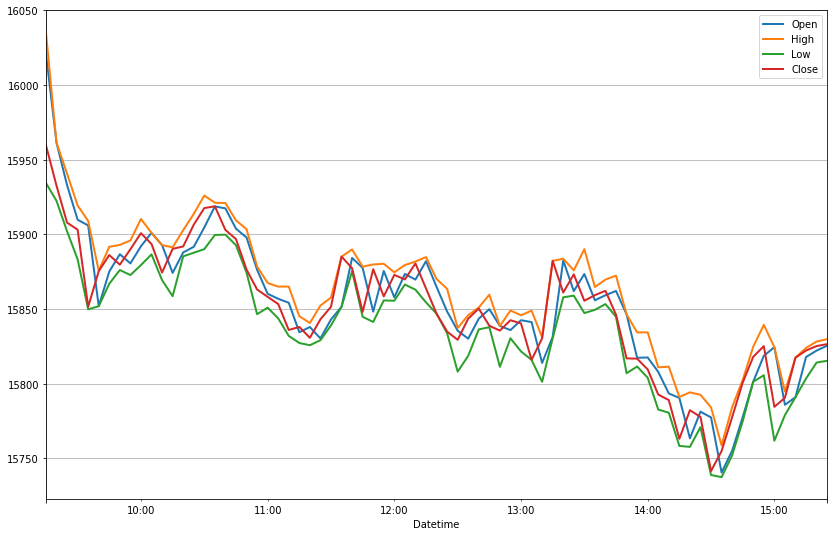

In [21]:
df.loc["2022-05-12", ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=2, figsize=(14, 9));

In [22]:
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)

In [23]:
df1a['cc_returns'] = df1a['Close'].pct_change()

In [24]:
df1a.head()

,Open,Close,Adj Close,sma,cc_returns
Datetime,,,,,
2022-04-19 09:15:00+05:30,17258.949219,17207.699219,17207.699219,NaN,NaN
2022-04-19 09:20:00+05:30,17207.550781,17192.349609,17192.349609,NaN,-0.000892
2022-04-19 09:25:00+05:30,17192.650391,17201.849609,17201.849609,NaN,0.000553
2022-04-19 09:30:00+05:30,17202.150391,17190.849609,17190.849609,NaN,-0.000639
2022-04-19 09:35:00+05:30,17190.500000,17168.500000,17168.500000,NaN,-0.001300


In [25]:
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head(12))
print(df1a.tail())

                                   Open         Close     Adj Close  \
Datetime                                                              
2022-04-19 09:15:00+05:30  17258.949219  17207.699219  17207.699219   
2022-04-19 09:20:00+05:30  17207.550781  17192.349609  17192.349609   
2022-04-19 09:25:00+05:30  17192.650391  17201.849609  17201.849609   
2022-04-19 09:30:00+05:30  17202.150391  17190.849609  17190.849609   
2022-04-19 09:35:00+05:30  17190.500000  17168.500000  17168.500000   
2022-04-19 09:40:00+05:30  17168.449219  17184.199219  17184.199219   
2022-04-19 09:45:00+05:30  17185.900391  17172.800781  17172.800781   
2022-04-19 09:50:00+05:30  17172.300781  17174.099609  17174.099609   
2022-04-19 09:55:00+05:30  17174.050781  17180.750000  17180.750000   
2022-04-19 10:00:00+05:30  17179.800781  17200.750000  17200.750000   
2022-04-19 10:05:00+05:30  17206.099609  17182.349609  17182.349609   
2022-04-19 10:10:00+05:30  17182.449219  17194.099609  17194.099609   

     

In [26]:
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)
print(df1a.head())
print(df1a.tail())
print(df1a['position'].value_counts())

                                   Open         Close     Adj Close  sma  \
Datetime                                                                   
2022-04-19 09:15:00+05:30  17258.949219  17207.699219  17207.699219  NaN   
2022-04-19 09:20:00+05:30  17207.550781  17192.349609  17192.349609  NaN   
2022-04-19 09:25:00+05:30  17192.650391  17201.849609  17201.849609  NaN   
2022-04-19 09:30:00+05:30  17202.150391  17190.849609  17190.849609  NaN   
2022-04-19 09:35:00+05:30  17190.500000  17168.500000  17168.500000  NaN   

                           cc_returns  position  
Datetime                                         
2022-04-19 09:15:00+05:30         NaN       NaN  
2022-04-19 09:20:00+05:30   -0.000892       0.0  
2022-04-19 09:25:00+05:30    0.000553       0.0  
2022-04-19 09:30:00+05:30   -0.000639       0.0  
2022-04-19 09:35:00+05:30   -0.001300       0.0  
                                   Open         Close     Adj Close  \
Datetime                                      

In [27]:
################################################################
################### Class Exercise 3 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################

# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?
'''IMPORTANT ASSUMPTION: We are trading at Close on the day when either our buy or sell condition is met. Lookahead 
bias is baked into our model. To begin with, while we learn, we can live with this. As we gradually rev up our 
programming skills we will relax our simplifying assumptions. '''

'IMPORTANT ASSUMPTION: We are trading at Close on the day when either our buy or sell condition is met. Lookahead \nbias is baked into our model. To begin with, while we learn, we can live with this. As we gradually rev up our \nprogramming skills we will relax our simplifying assumptions. '

```python

df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']


df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

print(df1a.head())
print(df1a.tail())

df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))
```


In [28]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

In [29]:
df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

print(df1a.head())
print(df1a.tail())

                                   Open         Close     Adj Close  sma  \
Datetime                                                                   
2022-04-19 09:15:00+05:30  17258.949219  17207.699219  17207.699219  NaN   
2022-04-19 09:20:00+05:30  17207.550781  17192.349609  17192.349609  NaN   
2022-04-19 09:25:00+05:30  17192.650391  17201.849609  17201.849609  NaN   
2022-04-19 09:30:00+05:30  17202.150391  17190.849609  17190.849609  NaN   
2022-04-19 09:35:00+05:30  17190.500000  17168.500000  17168.500000  NaN   

                           cc_returns  position  strategy_returns  
Datetime                                                           
2022-04-19 09:15:00+05:30         NaN       NaN               NaN  
2022-04-19 09:20:00+05:30    0.999108       0.0               1.0  
2022-04-19 09:25:00+05:30    1.000553       0.0               1.0  
2022-04-19 09:30:00+05:30    0.999361       0.0               1.0  
2022-04-19 09:35:00+05:30    0.998700       0.0            

In [30]:
df1a["strategy_returns"].value_counts()

1.000000    1302
1.000642       1
0.999844       1
0.999960       1
0.999777       1
            ... 
1.000249       1
1.000127       1
0.999162       1
0.999746       1
0.999439       1
Name: strategy_returns, Length: 1323, dtype: int64

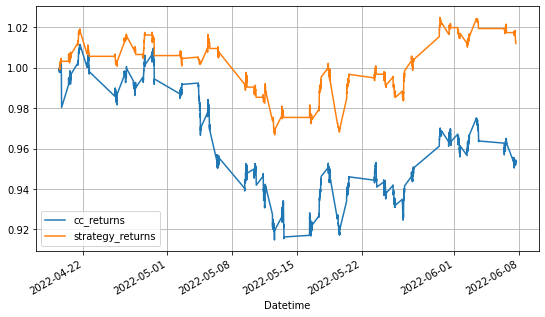

In [31]:
df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5));

In [32]:
df1a['cc_returns'].cumprod()

Datetime
2022-04-19 09:15:00+05:30         NaN
2022-04-19 09:20:00+05:30    0.999108
2022-04-19 09:25:00+05:30    0.999660
2022-04-19 09:30:00+05:30    0.999021
2022-04-19 09:35:00+05:30    0.997722
                               ...   
2022-06-07 15:05:00+05:30    0.954026
2022-06-07 15:10:00+05:30    0.954169
2022-06-07 15:15:00+05:30    0.954294
2022-06-07 15:20:00+05:30    0.953855
2022-06-07 15:25:00+05:30    0.953320
Name: cc_returns, Length: 2625, dtype: float64

In [33]:
print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))

Buy and hold returns:  0.95
Strategy returns:  1.01


#### Strategy # 1B: Exponential Moving Average *(Long only)*

We compute the 12 period exponential moving average ('EMA12') and compare it with the price at that time. This is similar to the previous one, instead we use the EMA.

When we calculate the SMA for `n` periods, the same weight is applied to each of the past `n` prices. In EMA, on the other hand, we apply different weights to each past price. Higher weights are assigned to the more recent ones. All modern finance libraries directly calculate it for us. EMA reacts faster to price action than SMA.

In [34]:
#############################################################
################## Class Exercise 4 #########################
#############################################################

# Create a copy of df called df1b. (We will manipulate and work with the df1a DataFrame.)
# Create a variable called ema and assign it a value 12
# Create a column called 'ema' which is the 12-period moving average of the 'Close' price
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
## IMPORTANT ASSUMPTION: Assume that when you get the indication to go long, you buy at the close price 5 minutes later
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?


```python

df1b = df.copy()

df1b['cc_returns'] = df1b['Close'].pct_change()
ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
print(df1b.head())
print(df1b.tail())
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(1)

df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())

df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']


df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head())
print(df1b.tail())

df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))

```

In [35]:
df1b = df.copy()

df1b['cc_returns'] = df1b['Close'].pct_change()
ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
print(df1b.head())
print(df1b.tail())
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(1)

df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())

df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']


df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head(3))

                                   Open          High           Low  \
Datetime                                                              
2022-04-19 09:15:00+05:30  17258.949219  17273.150391  17207.699219   
2022-04-19 09:20:00+05:30  17207.550781  17215.400391  17177.449219   
2022-04-19 09:25:00+05:30  17192.650391  17205.400391  17177.849609   
2022-04-19 09:30:00+05:30  17202.150391  17214.699219  17184.650391   
2022-04-19 09:35:00+05:30  17190.500000  17192.599609  17160.949219   

                                  Close     Adj Close  Volume  cc_returns  \
Datetime                                                                    
2022-04-19 09:15:00+05:30  17207.699219  17207.699219       0         NaN   
2022-04-19 09:20:00+05:30  17192.349609  17192.349609       0   -0.000892   
2022-04-19 09:25:00+05:30  17201.849609  17201.849609       0    0.000553   
2022-04-19 09:30:00+05:30  17190.849609  17190.849609       0   -0.000639   
2022-04-19 09:35:00+05:30  17168.500000 

1.0    1333
0.0    1291
Name: position, dtype: int64

                                   Open          High           Low  \
Datetime                                                              
2022-04-19 09:15:00+05:30  17258.949219  17273.150391  17207.699219   
2022-04-19 09:20:00+05:30  17207.550781  17215.400391  17177.449219   
2022-04-19 09:25:00+05:30  17192.650391  17205.400391  17177.849609   
2022-04-19 09:30:00+05:30  17202.150391  17214.699219  17184.650391   
2022-04-19 09:35:00+05:30  17190.500000  17192.599609  17160.949219   

                                  Close     Adj Close  Volume  cc_returns  \
Datetime                                                                    
2022-04-19 09:15:00+05:30  17207.699219  17207.699219       0         NaN   
2022-04-19 09:20:00+05:30  17192.349609  17192.349609       0   -0.000892   
2022-04-19 09:25:00+05:30  17201.849609  17201.849609       0    0.000553   
2022-04-19 09:30:00+05:30  17190.849609  17190.849609       0   -0.000639   
2022-04-19 09:35:00+05:30  17168.500000 

In [36]:
df1b['position'].value_counts()

1.0    1333
0.0    1291
Name: position, dtype: int64

In [37]:
df1b['position']

Datetime
2022-04-19 09:15:00+05:30    NaN
2022-04-19 09:20:00+05:30    0.0
2022-04-19 09:25:00+05:30    0.0
2022-04-19 09:30:00+05:30    0.0
2022-04-19 09:35:00+05:30    0.0
                            ... 
2022-06-07 15:05:00+05:30    1.0
2022-06-07 15:10:00+05:30    1.0
2022-06-07 15:15:00+05:30    1.0
2022-06-07 15:20:00+05:30    1.0
2022-06-07 15:25:00+05:30    1.0
Name: position, Length: 2625, dtype: float64

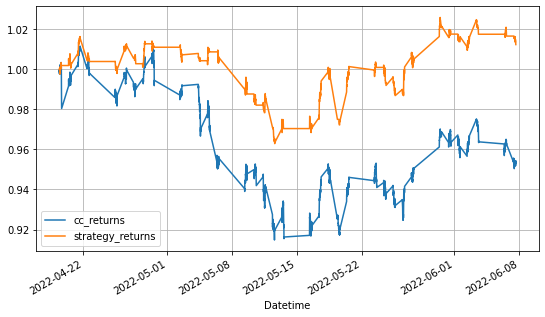

In [38]:
df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5));

In [39]:
print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))

Buy and hold returns:  0.95
Strategy returns:  1.01


<div class="alert alert-danger" style="margin: 10px"><strong>Note:</strong> All home exercises in the Notebook are for self-study.</div>

In [28]:
#############################################################
################## Home Exercise 1 ##########################
#############################################################

# Read about simple and exponential moving averages. Pay special attention to 
# cases where SMA is preferred over EMA or vice-versa.

#### Strategy # 2: Big moves on Mondays *(Long only)*

The [strategy](http://www.quantifiedstrategies.com/big-moves-on-mondays-update/) suggests that we go long on the S&P 500 on a Monday and close out our position on the Friday that week based on certain conditions. We assume that positions can be taken only in periods when markets are open on Monday and Friday in a week and the Friday in the previous week.

We calculate the following indicators and backtest the conditions shown below:

1. Calculate the 25-day average of `relative_range = (High - Low) / Close` and call it `rel_range_ma`.
2. The Monday `Close` must be lower than the previous Friday `Close` by at least 0.25 times of `rel_range_ma`. 
3. Create a variable `ibs = (Close - Low) / (High - Low)`. It must be lower than 0.3.
4. If conditions in 2, and 3 are met, go long on Monday `Close`.
5. Square off your position on Friday `Close`.

In [29]:
#############################################################
################## Class Exercise 5 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################


# Create a function called 'download_daily_data' where you use yfinance to automatically download
# daily data based on three input arguments - ticker, the start date and the end date. 

# Create a function called 'compute_daily_returns' where you calculate the log daily returns based on 'Close' prices.
# You pass the pandas DataFrame as an argument to the function.

# Create three variables 'ticker2', 'end2', and 'start2'. Initialize 'ticker' to be "SPY", 'end2' to be 2 July 2020, and
# 'start2' to be the day 15 years in the past (from today).

# Use 'download_daily_data' to download SPY prices for the last 15 years into df.
# Create a copy of df called df2. We will work with df2 for the rest of the strategy.
# Use 'compute_daily_returns' to calculate daily returns of SPY into df2



```python

def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    return data

ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()
df.tail()

df2 = df.copy()
df2 = compute_daily_returns(data=df2)

df2.head()
df2.tail()
```

In [30]:
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

In [31]:
def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    return data

In [32]:
ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()
df.tail()

df2 = df.copy()
df2 = compute_daily_returns(data=df2)

df2.head()
df2.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-05,119.250000,120.650002,119.190002,120.489998,86.827652,51549000
2005-07-06,120.389999,120.650002,119.410004,119.480003,86.099808,52363600
2005-07-07,118.290001,119.949997,118.260002,119.949997,86.438499,103268800
2005-07-08,119.970001,121.320000,119.720001,121.320000,87.425735,64491200
2005-07-11,121.330002,122.099998,121.309998,121.940002,87.872528,49688300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,299.883789,89468000
2020-06-26,306.160004,306.390015,299.420013,300.049988,292.761108,127961000
2020-06-29,301.410004,304.609985,298.929993,304.459991,297.063995,79773300
2020-06-30,303.989990,310.200012,303.820007,308.359985,300.869202,113394800
2020-07-01,309.570007,311.890015,309.070007,310.519989,302.976776,72396500


,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2005-07-05,119.250000,120.650002,119.190002,120.489998,86.827652,51549000,NaN
2005-07-06,120.389999,120.650002,119.410004,119.480003,86.099808,52363600,-0.008418
2005-07-07,118.290001,119.949997,118.260002,119.949997,86.438499,103268800,0.003926
2005-07-08,119.970001,121.320000,119.720001,121.320000,87.425735,64491200,0.011357
2005-07-11,121.330002,122.099998,121.309998,121.940002,87.872528,49688300,0.005097


,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,299.883789,89468000,0.010663
2020-06-26,306.160004,306.390015,299.420013,300.049988,292.761108,127961000,-0.024038
2020-06-29,301.410004,304.609985,298.929993,304.459991,297.063995,79773300,0.014591
2020-06-30,303.989990,310.200012,303.820007,308.359985,300.869202,113394800,0.012728
2020-07-01,309.570007,311.890015,309.070007,310.519989,302.976776,72396500,0.006980


In [33]:
#############################################################
################## Class Exercise 6 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################

# Create a function called 'compute_indicators' where you add additional columns 'day', 'prev_day', 
# 'four_days_after', 'relative_range', 'rel_range_ma', and 'ibs' to df2 and compute them.

# Create a function called 'backtest_strategy' where you work with df2 from the previous step. You can add additional 
# columns 'condition1', 'condition2', 'condition3' and use them to calculate strategy returns.

# Create a function called 'show_backtesting_results' where you use df2 and 
# print the strategy returns and buy-and-hold returns.
# The functions also plots the strategy returns, buy-and-hold returns and the positions over time.

# Now run all of the functions one after the other.

 ```python

def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data

def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data


def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8))

   
df = download_daily_data(ticker2, start2, end2)
df2 = df.copy()

df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)
```

In [34]:
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data

In [35]:
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data

[*********************100%***********************]  1 of 1 completed
Buy and hold returns:  0.95
Strategy returns:  0.98


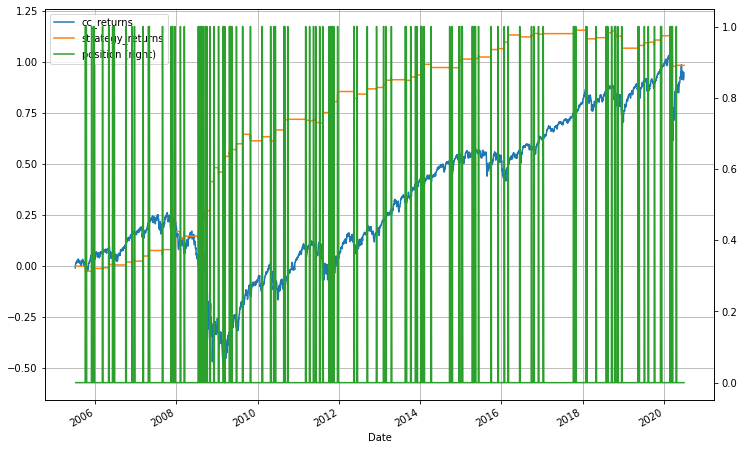

In [36]:
def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8));

   
df = download_daily_data(ticker2, start2, end2)
df2 = df.copy()

df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)

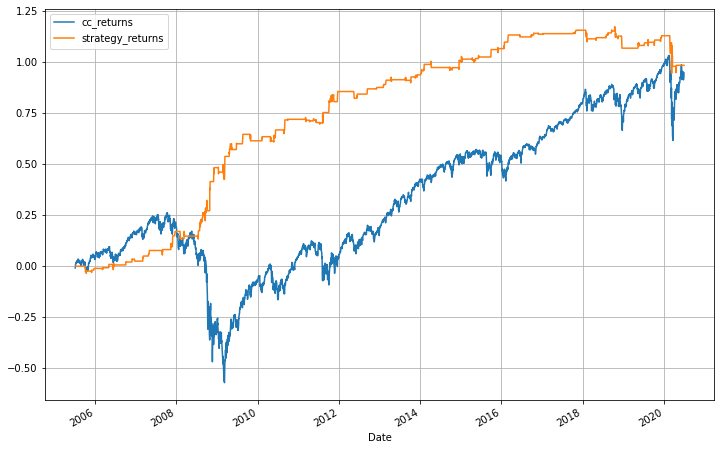

In [37]:
df2[['cc_returns', 'strategy_returns']].plot(grid=True, figsize=(12, 8));

In [38]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# df2['signal'].value_counts()
# df2['position'].value_counts()

# df2[['cc_returns', 'strategy_returns', 'signal']].plot(
#         secondary_y='signal', grid=True, figsize=(12, 8))

### Noteworthy points

- We have followed the [**modular programming**](https://en.wikipedia.org/wiki/Modular_programming) approach here. To wit: We break a large task into smaller tasks (i.e. functions) to increase readability and make it easier to incorporate changes or detect errors. 
- Any model we build is only as good as its assumptions. So carefully observe what implicit AND explicit assumptions you're making.
- **Ignoring market friction:** We have not taken into account transaction costs, slippage, taxes, etc. Remember that whatever results we get are a highly optimistic presentation of what would actually result.
- **Look-ahead bias:** We decide on the trade based on Monday's close price. Then, we trade at that price itself. This is perfectly fine when we are hitting our straps with programming and backtesting. However, in real life, you would have to trade at a price AFTER the close. We have implicitly assumed that we can get a trade at the close price. As we sharpen our strategy before launching it in live markets, we should factor this in and make suitable modifications.
- The code and approach that we follow here is specifically for working with historical data. It CANNOT be directly deployed in the live markets. Changes would need to be made. That's a subject for a different day. But you should be cognizant of this.
- You can read more about backtesting [here](https://blog.quantinsti.com/backtesting/) or in Ernie Chan's book on Algorithmic Trading (Chapter 1) at your leisure.

#### Strategy # 3: The Moving Average Crossover Strategy *(Long-short)*

We have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as  'SMA50') and the longer lookback period SMA (henceforth referred to as 'SMA200'). We go long on Tata Steel *at the first instance* when the SMA50 exceeds the SMA200. Similarly, we go short on it, *at the first instance* when the SMA200 exceeds the SMA50.

Our trading rules can be stated as

* Go long on day $n+2$ when SMA50 > SMA200 on day $n+1$ and SMA50 < SMA200 on day $n$
* Go short on day $n+2$ when SMA50 < SMA200 on day $n+1$ and SMA50 > SMA200 on day $n$

In [39]:
#################################################################
################### Class Exercise 7 ############################
#################################################################

# Create a variable called end3 for today. Use the datetime library.
# Create a variable start3 which is 10 years before end3
# Use the yfinance library to download daily data into a variable df for "TATASTEEL.NS" 
# between start3 and end3.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
# If above step looks fine, create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


# **In case you do not have yfinance installed**, please use the attached csv file and import into pandas
# You can name the pandas DataFrame 'df'
# Check the data type, the dimensions, the first few and last few rows of 'df'
# Create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


```python

ticker3 = "TATASTEEL.NS"
end3 = datetime.date(2020, 7, 2)
start3 = end3 - pd.Timedelta(days=365*10)

df = yf.download(ticker3, start3, end3)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()


# **ONLY** run the below lines if you have trouble with the library yfinance 


df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()
```

In [46]:
ticker3 = "TATASTEEL.NS"
end3 = datetime.date(2020, 7, 2)
start3 = end3 - pd.Timedelta(days=365*10)

df = yf.download(ticker3, start3, end3)
print(type(df))
print(df.shape)
print(df.head())
df3 = df.copy()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
(2461, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-07-05  453.502655  453.597900  447.786224  449.453522  340.993866   
2010-07-06  450.644440  459.171417  445.976013  457.694672  347.246277   
2010-07-07  461.124542  461.124542  451.120789  452.454620  343.270721   
2010-07-08  461.124542  465.792938  455.503387  461.839081  350.390625   
2010-07-09  465.650024  474.367584  463.506378  472.509735  358.486328   

             Volume  
Date                 
2010-07-05  2661872  
2010-07-06  5562172  
2010-07-07  7949280  
2010-07-08  5571721  
2010-07-09  6696250  


In [41]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y")
# df.to_csv("TATASTEEL.NS.csv")
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [42]:
############################################################################
######################### Class Exercise 8 #################################
############################################################################

# Create variables m=50 and n=200 for the shorter and longer lookback period respectively
# Create columns called 'sma50' and 'sma200' which are the moving averages based on the 'Adj Close' price
# Plot the 'sma50, 'sma200' and the 'Adj Close' for the data set
# Create columns 'sma50_prev_day' and 'sma200_prev_day' which are the moving averages shifted for the previous day
# Also periodically check df3 to see that each column is getting populated correctly.

```python

m = 50 # defining the shorter lookback period
n = 200 # defining the longer lookback period

df3['sma50'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma200'] = df3['Adj Close'].rolling(window=n).mean()

df3['sma50'] = df3['sma50'].shift(1)
df3['sma200'] = df3['sma200'].shift(1)

df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=0.5, figsize=(12, 8))

df3['sma50_prev_day'] = df3['sma50'].shift(1)
df3['sma200_prev_day'] = df3['sma200'].shift(1)

df3.head()
df3.tail()
df3.shape
```

<AxesSubplot:xlabel='Date'>

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2010-07-05,453.502655,453.597900,447.786224,449.453522,340.993866,2661872,NaN,NaN,NaN,NaN
2010-07-06,450.644440,459.171417,445.976013,457.694672,347.246277,5562172,NaN,NaN,NaN,NaN
2010-07-07,461.124542,461.124542,451.120789,452.454620,343.270721,7949280,NaN,NaN,NaN,NaN
2010-07-08,461.124542,465.792938,455.503387,461.839081,350.390625,5571721,NaN,NaN,NaN,NaN
2010-07-09,465.650024,474.367584,463.506378,472.509735,358.486328,6696250,NaN,NaN,NaN,NaN


,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2020-06-25,322.000000,327.399994,321.000000,323.100006,308.043274,11345653,280.153495,350.667848,279.367894,350.719809
2020-06-26,325.799988,329.950012,322.549988,323.850006,308.758331,9706333,280.926702,350.608499,280.153495,350.667848
2020-06-29,323.000000,326.000000,312.100006,320.850006,305.898132,11961133,281.664633,350.508154,280.926702,350.608499
2020-06-30,323.100006,337.649994,323.100006,326.700012,311.475525,36523647,282.273855,350.457862,281.664633,350.508154
2020-07-01,329.000000,329.600006,320.299988,323.700012,308.615326,10489433,282.909772,350.398036,282.273855,350.457862


(2461, 10)

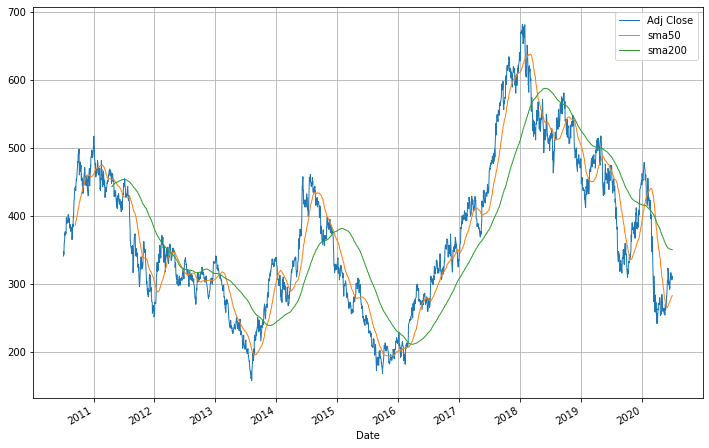

In [47]:
m = 50 # defining the shorter lookback period
n = 200 # defining the longer lookback period

df3['sma50'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma200'] = df3['Adj Close'].rolling(window=n).mean()

df3['sma50'] = df3['sma50'].shift(1)
df3['sma200'] = df3['sma200'].shift(1)

df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=1, figsize=(12, 8));

df3['sma50_prev_day'] = df3['sma50'].shift(1)
df3['sma200_prev_day'] = df3['sma200'].shift(1)

df3.head()
df3.tail()
df3.shape

In [48]:
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2020-06-25,322.000000,327.399994,321.000000,323.100006,308.043274,11345653,280.153495,350.667848,279.367894,350.719809
2020-06-26,325.799988,329.950012,322.549988,323.850006,308.758331,9706333,280.926702,350.608499,280.153495,350.667848
2020-06-29,323.000000,326.000000,312.100006,320.850006,305.898132,11961133,281.664633,350.508154,280.926702,350.608499
2020-06-30,323.100006,337.649994,323.100006,326.700012,311.475525,36523647,282.273855,350.457862,281.664633,350.508154
2020-07-01,329.000000,329.600006,320.299988,323.700012,308.615326,10489433,282.909772,350.398036,282.273855,350.457862


In [45]:
##############value_counts#######################################################
######################### Class Exercise 9 #################################
############################################################################

# Create a column called 'signal' which takes values 0, +1, and -1 for no trade that day,
#  buy that day and sell that day respectively. You can use the np.where routine.
# Use the magic command %timeit to check how long it takes to execute it
# Check the first few and last few rows of the data frame
# Check the # of signals of each that you got
# Use the .apply() method to create two columns 'buy_price' and 'sell_price'. The columns 
# should give you the 'Adj Close' price when the respective buy or sell conditions are met. Record the price
# as positive when it's a buy and negative when it's a sell
# Use the magic command %timeit to check how long it takes to execute it
# Compare the time taken between the two.
# Create a column called 'trade_price' which combines the data from 'buy_price' and 'sell_price'. Forward fill,
# all the zeroes with the previous non-zero prices
# Create a column called 'position' which takes the value 1 when you are long, -1 when you are short
# and 0 otherwise

```python

%%timeit

df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                        & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                        & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()


%%timeit

df3['buy_price'] = df3.apply(lambda x : x['Adj Close'] if x['sma50'] > x['sma200'] 
                        and x['sma50_prev_day'] < x['sma200_prev_day'] else 0, axis=1)

df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis=1)

df3['trade_price'] = df3['buy_price'] + df3['sell_price']
df3['trade_price']=df3['trade_price'].replace(to_replace=0, method='ffill')

df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
```

In [49]:
%%timeit

df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                        & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                        & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])

706 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [50]:
df3['signal'].value_counts()

 0    2450
-1       6
 1       5
Name: signal, dtype: int64

In [51]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day,signal
Date,,,,,,,,,,,
2010-07-05,453.502655,453.597900,447.786224,449.453522,340.993866,2661872,NaN,NaN,NaN,NaN,0
2010-07-06,450.644440,459.171417,445.976013,457.694672,347.246277,5562172,NaN,NaN,NaN,NaN,0
2010-07-07,461.124542,461.124542,451.120789,452.454620,343.270721,7949280,NaN,NaN,NaN,NaN,0
2010-07-08,461.124542,465.792938,455.503387,461.839081,350.390625,5571721,NaN,NaN,NaN,NaN,0
2010-07-09,465.650024,474.367584,463.506378,472.509735,358.486328,6696250,NaN,NaN,NaN,NaN,0


In [52]:
%%timeit

df3['buy_price'] = df3.apply(lambda x : x['Adj Close'] if x['sma50'] > x['sma200'] 
                        and x['sma50_prev_day'] < x['sma200_prev_day'] else 0, axis=1)

df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis=1)

77.9 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
df3.tail(10)

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day,signal,buy_price,sell_price
Date,,,,,,,,,,,,,
2020-06-18,308.200012,319.200012,307.100006,318.100006,303.276306,11369278,275.071877,351.060887,274.335853,351.226778,0,0.0,0.0
2020-06-19,321.000000,325.850006,317.299988,320.549988,305.612091,15134288,276.058646,350.986522,275.071877,351.060887,0,0.0,0.0
2020-06-22,319.750000,328.000000,318.350006,325.700012,310.522125,11031275,277.332386,350.868777,276.058646,350.986522,0,0.0,0.0
2020-06-23,327.700012,333.500000,326.149994,332.000000,316.528534,12545056,278.276252,350.809905,277.332386,350.868777,0,0.0,0.0
2020-06-24,336.600006,338.149994,324.750000,326.049988,310.855804,20782642,279.367894,350.719809,278.276252,350.809905,0,0.0,0.0
2020-06-25,322.000000,327.399994,321.000000,323.100006,308.043274,11345653,280.153495,350.667848,279.367894,350.719809,0,0.0,0.0
2020-06-26,325.799988,329.950012,322.549988,323.850006,308.758331,9706333,280.926702,350.608499,280.153495,350.667848,0,0.0,0.0
2020-06-29,323.000000,326.000000,312.100006,320.850006,305.898132,11961133,281.664633,350.508154,280.926702,350.608499,0,0.0,0.0
2020-06-30,323.100006,337.649994,323.100006,326.700012,311.475525,36523647,282.273855,350.457862,281.664633,350.508154,0,0.0,0.0


In [54]:
df3['trade_price'] = df3['buy_price'] + df3['sell_price']
df3['trade_price']=df3['trade_price'].replace(to_replace=0, method='ffill')

df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')

In [55]:
############################################################################
######################### Class Exercise 10 ################################
############################################################################

# Plot the positions over time.
# Plot the strategy returns, and buy-and-hold returns.
# Display the strategy returns and buy-and-hold returns.

```python

# Alternate way to plot graphs
plt.figure(figsize=(10, 5))
plt.plot(df3['position'])
plt.title("Long and Short positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))

print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 2))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 2))
```

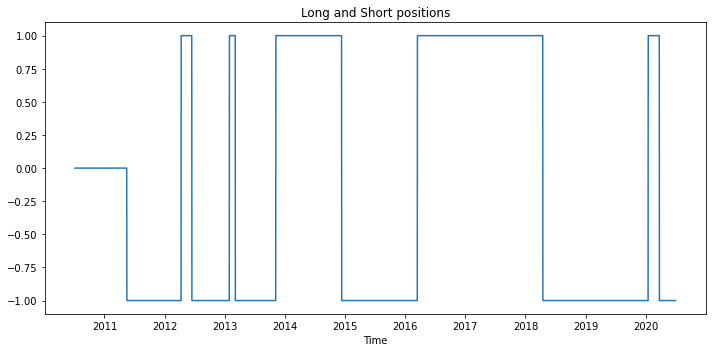

In [56]:
# Alternate way to plot graphs
plt.figure(figsize=(10, 5))
plt.plot(df3['position'])
plt.title("Long and Short positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show();

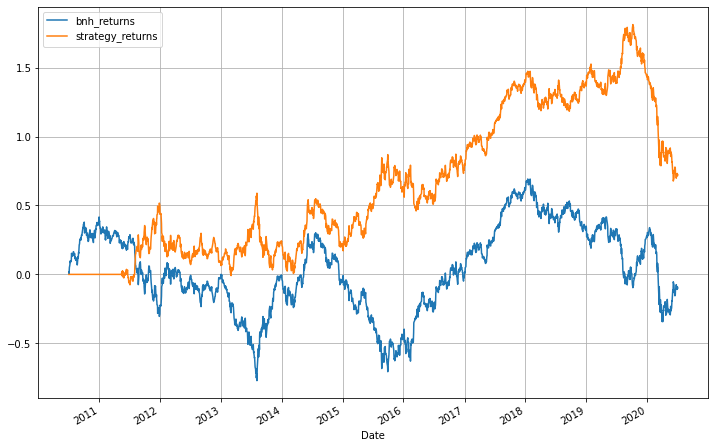

In [57]:
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8));

In [58]:
print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 3))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 2))

Buy and hold returns:  -0.1
Strategy returns:  0.72


In [59]:
df3['bnh_returns2'] = df3['Adj Close'].pct_change()

In [60]:
df3['strategy_returns2'] = df3['bnh_returns2'] * df3['position'].shift(1)

In [61]:
print('Buy and hold returns2: ', np.round((1 + df3['bnh_returns2']).cumprod()[-1] - 1, 3))


Buy and hold returns2:  -0.095


In [62]:
(1 + df3['bnh_returns2']).cumprod()

Date
2010-07-05         NaN
2010-07-06    1.018336
2010-07-07    1.006677
2010-07-08    1.027557
2010-07-09    1.051298
                ...   
2020-06-25    0.903369
2020-06-26    0.905466
2020-06-29    0.897078
2020-06-30    0.913434
2020-07-01    0.905047
Name: bnh_returns2, Length: 2461, dtype: float64

In [63]:
print('Stategy returns2: ', np.round((1 + df3['strategy_returns2']).cumprod()[-1]- 1, 4))

Stategy returns2:  -0.0703


In [64]:
df3.iloc[215:230]

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day,signal,buy_price,sell_price,trade_price,position,bnh_returns,strategy_returns,bnh_returns2,strategy_returns2
Date,,,,,,,,,,,,,,,,,,,
2011-05-13,558.398926,573.547485,557.160400,565.925537,436.398956,2634168,449.608419,448.840502,449.933881,448.660322,0,0.0,0.00000,0.00000,0,0.015781,0.000000,0.015906,0.000000
2011-05-16,564.972839,564.972839,549.157410,550.491211,424.497162,2884594,449.415199,449.066783,449.608419,448.840502,0,0.0,0.00000,0.00000,0,-0.027652,-0.000000,-0.027273,-0.000000
2011-05-17,552.777771,557.350952,539.915833,546.823181,421.668610,3488677,448.582811,449.242922,449.415199,449.066783,-1,0.0,-421.66861,-421.66861,-1,-0.006686,-0.000000,-0.006663,-0.000000
2011-05-18,548.776306,551.539246,539.487122,544.679565,420.015625,2656367,447.841520,449.394817,448.582811,449.242922,0,0.0,0.00000,-421.66861,-1,-0.003928,0.003928,-0.003920,0.003920
2011-05-19,542.154785,547.680664,534.151794,536.152527,413.440216,3128017,447.158270,449.536610,447.841520,449.394817,0,0.0,0.00000,-421.66861,-1,-0.015779,0.015779,-0.015655,0.015655
2011-05-20,538.010376,556.112366,536.390747,552.158508,425.782806,3342125,446.570527,449.631200,447.158270,449.536610,0,0.0,0.00000,-421.66861,-1,0.029416,-0.029416,0.029853,-0.029853
2011-05-23,547.394836,547.394836,531.198303,532.960876,410.979034,2454794,446.034948,449.749850,446.570527,449.631200,0,0.0,0.00000,-421.66861,-1,-0.035387,0.035387,-0.034768,0.034768
2011-05-24,530.912476,542.011902,527.387390,539.725281,416.195251,5126518,445.248107,449.795400,446.034948,449.749850,0,0.0,0.00000,-421.66861,-1,0.012612,-0.012612,0.012692,-0.012692
2011-05-25,540.868591,543.298096,531.865234,534.675781,412.301422,4635347,444.806567,449.890725,445.248107,449.795400,0,0.0,0.00000,-421.66861,-1,-0.009400,0.009400,-0.009356,0.009356


#### [Strategy 4: MACD (Moving Average Convergence Divergence)](https://blog.quantinsti.com/python-trading/#Creating%20a%20sample%20trading%20strategy%20and%20backtesting%20in%20Python) *(Long-short)*

It is a simple and effective trend-following indicator.

The strategy uses:
- `MACD = 26 day EMA of 'Close' - 12 day EMA of 'Close'`, and
- `signal = 9 day EMA of MACD`

The trading signals are generated using `MACD` and `signal`.

- When `MACD` crosses above `signal`, we go long on the underlying security
- When `MACD` crosses below `signal`, then we go short on it

In [ ]:
#############################################################
################## Home Exercise 2 ##########################
#############################################################

# Read the article (shared above). 
# If possible, try writing the code to backtest the strategy yourself 
# You can check with the code below.
# Inspect it carefully so as to understand each line.

```python

ticker4 = "FB"
end4 = datetime.date(2020, 7, 2)
start4 = end4 - pd.Timedelta(days=365*5)

df = yf.download(ticker4, start4, end4)

df.shape
df.head()
df.tail()

df4 = df.copy()

df4['ema26'] = df4['Close'].ewm(span=26, adjust=False).mean()
df4['ema12'] = df4['Close'].ewm(span=12, adjust=False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']

df4['signal'] = df4['MACD'].ewm(span=9, adjust=False).mean()

df4[['signal', 'MACD', 'Close']].plot(figsize=(12, 8), grid=True, secondary_y='Close')

df4['position'] = np.where(df4['MACD'] > df4['signal'], 1, -1)
df4['position'] = df4['position'].shift(1)

df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns'] * df4['position']

df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod() - 1

df4['cumulative_returns'].plot(figsize=(12, 8), grid=True)

df4[['cumulative_returns', 'position']].plot(figsize=(12, 8), secondary_y='position', grid=True)

```

In [ ]:
ticker4 = "FB"
end4 = datetime.date(2020, 7, 2)
start4 = end4 - pd.Timedelta(days=365*5)

df = yf.download(ticker4, start4, end4)

df.shape
df.head()
df.tail()

In [ ]:
df4 = df.copy()

df4['ema26'] = df4['Close'].ewm(span=26, adjust=False).mean()
df4['ema12'] = df4['Close'].ewm(span=12, adjust=False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']

df4['signal'] = df4['MACD'].ewm(span=9, adjust=False).mean()

df4[['signal', 'MACD', 'Close']].plot(figsize=(12, 8), grid=True, secondary_y='Close');

In [ ]:
df4['position'] = np.where(df4['MACD'] > df4['signal'], 1, -1)
df4['position'] = df4['position'].shift(1)

df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns'] * df4['position']

df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod() - 1

df4['cumulative_returns'].plot(figsize=(12, 8), grid=True)

df4[['cumulative_returns', 'position']].plot(figsize=(12, 8), secondary_y='position', grid=True);

#### A glimpse at [`Pyfolio`](https://pypi.org/project/pyfolio/)

From the documentation:

> `Pyfolio` is a Python library for the performance and risk analysis of financial portfolios. At its core, is a so-called **tear sheet** that consists of various individual plots that provide a comprehensive performance overview of a portfolio.

> Pyfolio analyzes a backtest and provides a wealth of performance statistics commonly used by professional fund managers including annual/monthly returns, return quantiles, rolling beta/Sharpe ratios, portfolio turnover, and more.



```python

import pyfolio as pf
pf.create_simple_tear_sheet(df4['strategy_returns'], benchmark_rets=None)
pf.create_full_tear_sheet(df4['cc_returns'])
```

In [ ]:
import pyfolio as pf
pf.create_simple_tear_sheet(df3['strategy_returns2'], benchmark_rets=None)

In [ ]:
pf.create_full_tear_sheet(df4['cc_returns'])